# Bernoulli and Binomial Distribution - Lab

## Introduction
In this lab, you'll practice your newly gained knowledge on the Bernoulli and Binomial Distribution.

## Objectives
You will be able to:
* Apply the formulas for the Binomial and Bernoulli distribution
* Apply NumPy to randomly generate Binomial and Bernoulli trials
* Use Matplotlib to generate Binomial and Bernoulli trials with various probabilities

## Apply the formulas for the Binomial and Bernoulli distribution

When playing a game of bowling, what is the probability of throwing exactly 3 strikes in a game with 10 rounds? Assume that the probability of throwing a strike is 25% for each round. Use the formula for the Binomial distribution to get to the answer. You've created this before, so we provide you with the function for factorials again:

In [5]:
def factorial(n):
    prod = 1
    while n >= 1:
        prod = prod * n
        n = n - 1
    return prod

In [6]:
probStrike=.25
rounds = 10
success = 3

nCk = factorial(rounds)/(factorial(rounds-success)*factorial(success))#answer = 0.2502822
p= (probStrike**success)*((1-probStrike)**(rounds-success))
p_3_strikes=p*nCk

p_3_strikes

0.25028228759765625

Now, create a function for the Binomial distribution with three arguments $n$, $p$ and $k$ just like in the formula.

In [7]:
def binom_distr(n,p,k):
    nCk = factorial(n)/(factorial(n-k)*factorial(k))#answer = 0.2502822
    prob= (p**k)*((1-p)**(n-k))
    return prob*nCk

Validate your previous result applying your new function.

In [8]:
binom_distr(10,.25,3)

0.25028228759765625

Now write a for loop along with your function to compute the probability that you have five strikes or more in one game. You'll want to use numpy here!

In [9]:
import numpy as np

def somecumulativeprobability(start,end,n,p):
    bins= []
    while start<end:    
        for strike in range(start,n+1):
            bins.append(binom_distr(n,p,strike))
        return sum(bins)
    
somecumulativeprobability(5,10,10,.25)

0.07812690734863281

In [10]:
import numpy as np
prob = 0
for i in np.arange(5,11):
     prob += binom_distr(10,0.25,i)
        
prob

0.07812690734863281

## Use a simulation to get the probabilities for all the potential outcomes

Repeat the experiment 5000 times.

In [21]:
# leave the random seed here 
np.random.seed(123)

n = 5000
iteration = []
for loop in range(n):
    iteration.append(np.random.binomial(10, 0.25))
    np_it = np.array(iteration)

count,values = np.unique(np_it, return_counts=True)
# uniqueArray
# dictV = dict(list(zip(count,values)))

print(count)
print(values)

[0 1 2 3 4 5 6 7 8]
[ 310  941 1368 1286  707  297   78   11    2]


In [12]:
# the results should look like this:
# [0 1 2 3 4 5 6 7 8]
# [ 310  941 1368 1286  707  297   78   11    2]

## Visualize these results

Make sure to set an appropriate title and appropriate y-axis label

Text(0.5,1,'Total number of strikes in a bowling game')

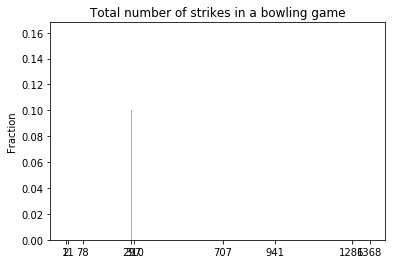

In [20]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.bar(values, count/50, align='center', alpha=0.5)
plt.xticks(values)
plt.ylabel('Fraction')
plt.title('Total number of strikes in a bowling game')


#
#
#

You can see that, with a 25% strike hit rate, even when simulating 5000 times, an almost perfect and perfect game of 9 and 10 strikes didn't even occur once! If you change your seed, however, you'll see that occasionally perfect games will show up randomly. 

## Summary

Congratulations! In this lab, you practiced your newly gained knowledge on the Bernoulli and Binomial Distribution.